### BFS、DFS总结
###### [岛屿问题总结](https://leetcode.cn/problems/number-of-islands/solution/200-dao-yu-shu-liang-by-wo-zhao-wo-de-ba-0y5x/)
###### [BFS/DFS总结](http://www.cyc2018.xyz/%E7%AE%97%E6%B3%95/Leetcode%20%E9%A2%98%E8%A7%A3/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E6%90%9C%E7%B4%A2.html#bfs)
###### [二进制矩阵中的最短路径-Python-BFS/DFS-两者的区别](https://leetcode.cn/problems/shortest-path-in-binary-matrix/solution/1091-er-jin-zhi-ju-zhen-zhong-de-zui-dua-vgdw/)

### 适用场景总结：
##### BFS通常用于“最短XX”,"最少XX"等问题，因为它每一步都考虑所有情况，所以能找到最小步数
##### DFS通常用于可达性问题，它每一步都会将一种情走完


### 一般步骤
##### BFS(二进制矩阵中的最短路径)
##### 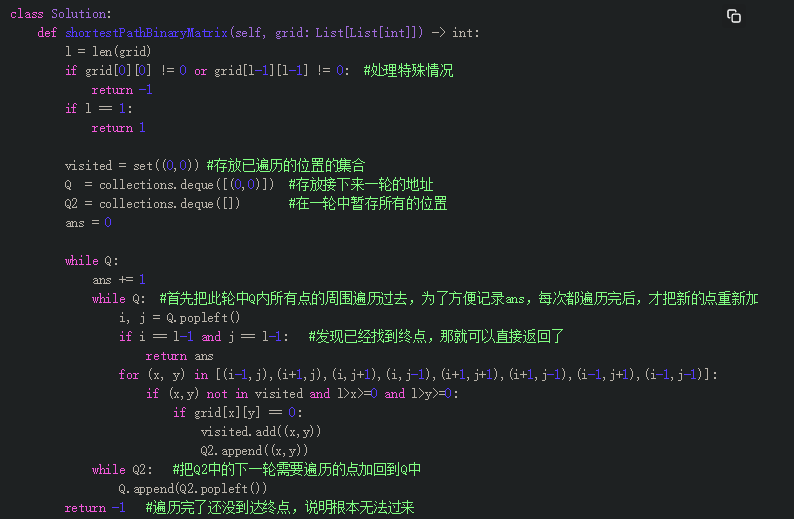
##### DFS(岛屿问题)
##### 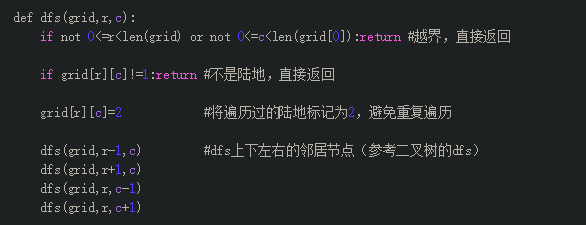

#### 我是分界线------------------------------------------------------------------------------------------------------------------------------------------------------我是分界线

## BFS相关题目

In [1]:
from collections import deque
from time import time

### LC.994 腐烂的橘子 [腐烂的橘子](https://leetcode.cn/problems/rotting-oranges/)
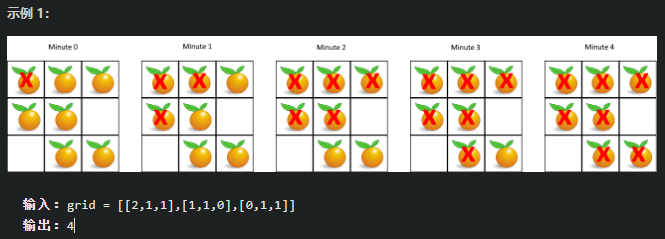

In [2]:
## 几个特殊请款需要考虑清楚
def lc994(grid):
    deq = deque()
    deq2 = deque()

    m,n = len(grid),len(grid[0])
    label = 0
    ## 特殊情况判断
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 2:
                deq.append((i,j))
            if grid[i][j] == 1:
                label += 1
    if len(deq) == 0 and label == 0:
        return 0

    result = 0
    while deq:

        while deq:
            i,j = deq.popleft()
            grid[i][j] = 0
            for x,y in (i-1,j),(i+1,j),(i,j-1),(i,j+1):
                if not 0<=x<m or not 0<=y<n or grid[x][y] == 0 or (x,y) in deq:
                    continue
                if grid[x][y] == 1:
                    deq2.append((x,y))
        if len(deq2) > 0:
            result += 1
        while deq2:
            deq.append(deq2.popleft())

    for i in range(m):
        for j in range(n):
            if grid[i][j] == 1:
                return -1
    return result

grid = [[2,1,1],[1,1,0],[0,1,1]]
lc994(grid)

4

### LC.1091 二进制矩阵中的最短路径 [二进制矩阵中的最短路径](https://leetcode.cn/problems/shortest-path-in-binary-matrix/)
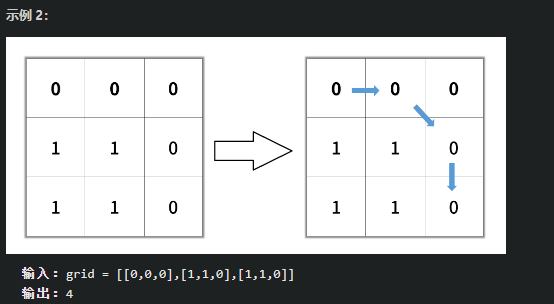

In [3]:
## 结果正确，但是leetcode上超时，未排查出错误   # Todo 
## 能通过版本：https://leetcode.cn/submissions/detail/390953441/
def lc1091(grid):
    if grid[0][0] == 1:
        return -1
    
    m,n = len(grid),len(grid[0])
    deq = deque()
    deq2 = set()                ## 解决Todo:更换deq2的数据类型
    deq.append((0,0))
    
    result = 0
    while deq:
        result += 1
        while deq:
            i,j = deq.popleft()
            grid[i][j] = 1
            if i==m-1 and j == n-1:
                return result 
            for x,y in (i-1,j-1),(i-1,j),(i-1,j+1),(i,j-1),(i,j+1),(i+1,j-1),(i+1,j),(i+1,j+1):
                if not 0<=x<m or not 0<=y<n or grid[x][y]==1:
                    continue
                else:
                    deq2.add((x,y))
        while deq2:
            deq.append(deq2.pop())
    return -1
grid = [[0,0,0],[1,1,0],[1,1,0]]
grid1 = [[1,0,0],[1,1,0],[1,1,0]]
grid2 = [[0,0,0],[1,1,0],[1,1,0]]
lc1091(grid),lc1091(grid1),lc1091(grid2)

(4, -1, 4)

### LC.279 完全平方数 [完全平方数](https://leetcode.cn/problems/perfect-squares/description/)
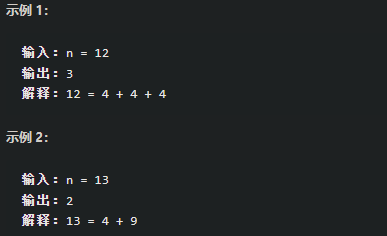

In [4]:
def lc279(n):
    nums = [i*i for i in range(1,n) if i*i<=n]
    deq = deque()
    deq2 = set()   ## 超时原因：因为查询i in set的效率是O(1), 查询i in list的效率是O(n),所以用list会超时
    deq.append(n)
    
    result = -1 # 初始deq中的数算就是0，初始deq中的数不算就是-1
    while deq:
        result += 1
        while deq:
            i = deq.popleft()
            if i == 0:
                return result
            for num in nums:
                if num <= i and i-num not in deq2:
                    deq2.add(i-num)
        while deq2:
            deq.append(deq2.pop())
    return -1
lc279(12),lc279(13),lc279(7168)

(3, 2, 4)

### LC.127 单词接龙 [单词接龙](https://leetcode.cn/problems/word-ladder/description/)
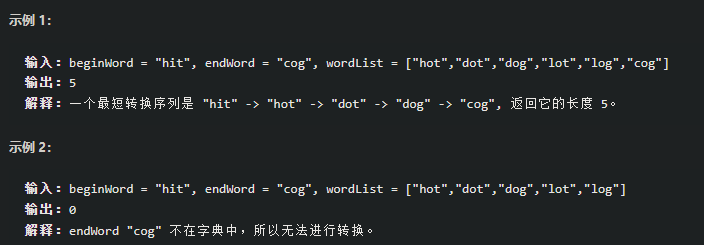

In [5]:
# Todo : leetcode中超时，还未解决
def lc127(beginWord, endWord, wordList):
    def check(s1,s2):
        # 检查两个字符串是不是只有一个字符不同
        res = 0
        for i in range(len(s1)):
            if s1[i] != s2[i]:
                res += 1
        return res == 1
    
    # 判断特殊情况
    if endWord not in wordList:
        return 0
    
    # 初始化
    deq = deque()
    deq2 = set()
    used = set()
    result = 0
    deq.append(beginWord)
    
    # BFS 
    while deq:
        result += 1
        while deq:
            s = deq.popleft()
            used.add(s)
            if s == endWord:
                return result
            for i in wordList:
                if i not in used and check(i,s) and i not in deq2:
                    deq2.add(i)
        while deq2:
            deq.append(deq2.pop())
    return 0
b = "nanny"
e = "aloud"
word = ["ricky","grind","cubic","panic","lover","farce","gofer","sales","flint","omens","lipid","briny","cloth","anted","slime","oaten","harsh","touts","stoop","cabal","lazed","elton","skunk","nicer","pesky","kusch","bused","kinda","tunis","enjoy","aches","prowl","babar","rooms","burst","slush","pines","urine","pinky","bayed","mania","light","flare","wares","women","verne","moron","shine","bluer","zeros","bleak","brief","tamra","vasts","jamie","lairs","penal","worst","yowls","pills","taros","addle","alyce","creep","saber","floyd","cures","soggy","vexed","vilma","cabby","verde","euler","cling","wanna","jenny","donor","stole","sakha","blake","sanes","riffs","forge","horus","sered","piked","prosy","wases","glove","onset","spake","benin","talks","sites","biers","wendy","dante","allan","haven","nears","shaka","sloth","perky","spear","spend","clint","dears","sadly","units","vista","hinds","marat","natal","least","bough","pales","boole","ditch","greys","slunk","bitch","belts","sense","skits","monty","yawns","music","hails","alien","gibes","lille","spacy","argot","wasps","drubs","poops","bella","clone","beast","emend","iring","start","darla","bells","cults","dhaka","sniff","seers","bantu","pages","fever","tacky","hoses","strop","climb","pairs","later","grant","raven","stael","drips","lucid","awing","dines","balms","della","galen","toned","snips","shady","chili","fears","nurse","joint","plump","micky","lions","jamal","queer","ruins","frats","spoof","semen","pulps","oldie","coors","rhone","papal","seals","spans","scaly","sieve","klaus","drums","tided","needs","rider","lures","treks","hares","liner","hokey","boots","primp","laval","limes","putts","fonda","damon","pikes","hobbs","specs","greet","ketch","braid","purer","tsars","berne","tarts","clean","grate","trips","chefs","timex","vicky","pares","price","every","beret","vices","jodie","fanny","mails","built","bossy","farms","pubic","gongs","magma","quads","shell","jocks","woods","waded","parka","jells","worse","diner","risks","bliss","bryan","terse","crier","incur","murky","gamed","edges","keens","bread","raced","vetch","glint","zions","porno","sizes","mends","ached","allie","bands","plank","forth","fuels","rhyme","wimpy","peels","foggy","wings","frill","edgar","slave","lotus","point","hints","germs","clung","limed","loafs","realm","myron","loopy","plush","volts","bimbo","smash","windy","sours","choke","karin","boast","whirr","tiber","dimes","basel","cutes","pinto","troll","thumb","decor","craft","tared","split","josue","tramp","screw","label","lenny","apses","slept","sikhs","child","bouts","cites","swipe","lurks","seeds","fists","hoard","steed","reams","spoil","diego","peale","bevel","flags","mazes","quart","snipe","latch","lards","acted","falls","busby","holed","mummy","wrong","wipes","carlo","leers","wails","night","pasty","eater","flunk","vedas","curse","tyros","mirth","jacky","butte","wired","fixes","tares","vague","roved","stove","swoon","scour","coked","marge","cants","comic","corns","zilch","typos","lives","truer","comma","gaily","teals","witty","hyper","croat","sways","tills","hones","dowel","llano","clefs","fores","cinch","brock","vichy","bleed","nuder","hoyle","slams","macro","arabs","tauts","eager","croak","scoop","crime","lurch","weals","fates","clipt","teens","bulls","domed","ghana","culls","frame","hanky","jared","swain","truss","drank","lobby","lumps","pansy","whews","saris","trite","weeps","dozes","jeans","flood","chimu","foxes","gelds","sects","scoff","poses","mares","famed","peers","hells","laked","zests","wring","steal","snoot","yodel","scamp","ellis","bandy","marry","jives","vises","blurb","relay","patch","haley","cubit","heine","place","touch","grain","gerry","badly","hooke","fuchs","savor","apron","judge","loren","britt","smith","tammy","altar","duels","huber","baton","dived","apace","sedan","basts","clark","mired","perch","hulks","jolly","welts","quack","spore","alums","shave","singe","lanny","dread","profs","skeet","flout","darin","newed","steer","taine","salvo","mites","rules","crash","thorn","olive","saves","yawed","pique","salon","ovens","dusty","janie","elise","carve","winds","abash","cheep","strap","fared","discs","poxed","hoots","catch","combo","maize","repay","mario","snuff","delve","cored","bards","sudan","shuns","yukon","jowls","wayne","torus","gales","creek","prove","needy","wisps","terri","ranks","books","dicky","tapes","aping","padre","roads","nines","seats","flats","rains","moira","basic","loves","pulls","tough","gills","codes","chest","teeny","jolts","woody","flame","asked","dulls","hotly","glare","mucky","spite","flake","vines","lindy","butts","froth","beeps","sills","bunny","flied","shaun","mawed","velds","voled","doily","patel","snake","thigh","adler","calks","desks","janus","spunk","baled","match","strip","hosed","nippy","wrest","whams","calfs","sleet","wives","boars","chain","table","duked","riped","edens","galas","huffs","biddy","claps","aleut","yucks","bangs","quids","glenn","evert","drunk","lusts","senna","slate","manet","roted","sleep","loxes","fluky","fence","clamp","doted","broad","sager","spark","belch","mandy","deana","beyer","hoist","leafy","levee","libel","tonic","aloes","steam","skews","tides","stall","rifts","saxon","mavis","asama","might","dotes","tangs","wroth","kited","salad","liens","clink","glows","balky","taffy","sided","sworn","oasis","tenth","blurt","tower","often","walsh","sonny","andes","slump","scans","boded","chive","finer","ponce","prune","sloes","dined","chums","dingo","harte","ahead","event","freer","heart","fetch","sated","soapy","skins","royal","cuter","loire","minot","aisle","horny","slued","panel","eight","snoop","pries","clive","pored","wrist","piped","daren","cells","parks","slugs","cubed","highs","booze","weary","stain","hoped","finny","weeds","fetid","racer","tasks","right","saint","shahs","basis","refer","chart","seize","lulls","slant","belay","clots","jinny","tours","modes","gloat","dunks","flute","conch","marts","aglow","gayer","lazes","dicks","chime","bears","sharp","hatch","forms","terry","gouda","thins","janet","tonya","axons","sewed","danny","rowdy","dolts","hurry","opine","fifty","noisy","spiky","humid","verna","poles","jayne","pecos","hooky","haney","shams","snots","sally","ruder","tempe","plunk","shaft","scows","essie","dated","fleet","spate","bunin","hikes","sodas","filly","thyme","fiefs","perks","chary","kiths","lidia","lefty","wolff","withe","three","crawl","wotan","brown","japed","tolls","taken","threw","crave","clash","layer","tends","notes","fudge","musky","bawdy","aline","matts","shirr","balks","stash","wicks","crepe","foods","fares","rotes","party","petty","press","dolly","mangy","leeks","silly","leant","nooks","chapt","loose","caged","wages","grist","alert","sheri","moody","tamps","hefts","souls","rubes","rolex","skulk","veeps","nonce","state","level","whirl","bight","grits","reset","faked","spiny","mixes","hunks","major","missy","arius","damns","fitly","caped","mucus","trace","surat","lloyd","furry","colin","texts","livia","reply","twill","ships","peons","shear","norms","jumbo","bring","masks","zippy","brine","dorks","roded","sinks","river","wolfs","strew","myths","pulpy","prank","veins","flues","minus","phone","banns","spell","burro","brags","boyle","lambs","sides","knees","clews","aired","skirt","heavy","dimer","bombs","scums","hayes","chaps","snugs","dusky","loxed","ellen","while","swank","track","minim","wiled","hazed","roofs","cantu","sorry","roach","loser","brass","stint","jerks","dirks","emory","campy","poise","sexed","gamer","catty","comte","bilbo","fasts","ledge","drier","idles","doors","waged","rizal","pured","weirs","crisp","tasty","sored","palmy","parts","ethel","unify","crows","crest","udder","delis","punks","dowse","totes","emile","coded","shops","poppa","pours","gushy","tiffs","shads","birds","coils","areas","boons","hulls","alter","lobes","pleat","depth","fires","pones","serra","sweat","kline","malay","ruled","calve","tired","drabs","tubed","wryer","slung","union","sonya","aided","hewed","dicey","grids","nixed","whits","mills","buffs","yucky","drops","ready","yuppy","tweet","napes","cadre","teach","rasps","dowdy","hoary","canto","posed","dumbo","kooks","reese","snaky","binge","byron","phony","safer","friar","novel","scale","huron","adorn","carla","fauna","myers","hobby","purse","flesh","smock","along","boils","pails","times","panza","lodge","clubs","colby","great","thing","peaks","diana","vance","whets","bergs","sling","spade","soaks","beach","traps","aspen","romps","boxed","fakir","weave","nerds","swazi","dotty","curls","diver","jonas","waite","verbs","yeast","lapel","barth","soars","hooks","taxed","slews","gouge","slags","chang","chafe","saved","josie","syncs","fonds","anion","actor","seems","pyrex","isiah","glued","groin","goren","waxes","tonia","whine","scads","knelt","teaks","satan","tromp","spats","merry","wordy","stake","gland","canal","donna","lends","filed","sacks","shied","moors","paths","older","pooch","balsa","riced","facet","decaf","attic","elder","akron","chomp","chump","picky","money","sheer","bolls","crabs","dorms","water","veers","tease","dummy","dumbs","lethe","halls","rifer","demon","fucks","whips","plops","fuses","focal","taces","snout","edict","flush","burps","dawes","lorry","spews","sprat","click","deann","sited","aunts","quips","godly","pupil","nanny","funks","shoon","aimed","stacy","helms","mints","banks","pinch","local","twine","pacts","deers","halos","slink","preys","potty","ruffs","pusan","suits","finks","slash","prods","dense","edsel","heeds","palls","slats","snits","mower","rares","ailed","rouge","ellie","gated","lyons","duded","links","oaths","letha","kicks","firms","gravy","month","kongo","mused","ducal","toted","vocal","disks","spied","studs","macao","erick","coupe","starr","reaps","decoy","rayon","nicks","breed","cosby","haunt","typed","plain","trays","muled","saith","drano","cower","snows","buses","jewry","argus","doers","flays","swish","resin","boobs","sicks","spies","bails","wowed","mabel","check","vapid","bacon","wilda","ollie","loony","irked","fraud","doles","facts","lists","gazed","furls","sunks","stows","wilde","brick","bowed","guise","suing","gates","niter","heros","hyped","clomp","never","lolls","rangy","paddy","chant","casts","terns","tunas","poker","scary","maims","saran","devon","tripe","lingo","paler","coped","bride","voted","dodge","gross","curds","sames","those","tithe","steep","flaks","close","swops","stare","notch","prays","roles","crush","feuds","nudge","baned","brake","plans","weepy","dazed","jenna","weiss","tomes","stews","whist","gibed","death","clank","cover","peeks","quick","abler","daddy","calls","scald","lilia","flask","cheer","grabs","megan","canes","jules","blots","mossy","begun","freak","caved","hello","hades","theed","wards","darcy","malta","peter","whorl","break","downs","odder","hoofs","kiddo","macho","fords","liked","flees","swing","elect","hoods","pluck","brook","astir","bland","sward","modal","flown","ahmad","waled","craps","cools","roods","hided","plath","kings","grips","gives","gnats","tabby","gauls","think","bully","fogey","sawed","lints","pushy","banes","drake","trail","moral","daley","balds","chugs","geeky","darts","soddy","haves","opens","rends","buggy","moles","freud","gored","shock","angus","puree","raves","johns","armed","packs","minis","reich","slots","totem","clown","popes","brute","hedge","latin","stoke","blend","pease","rubik","greer","hindi","betsy","flows","funky","kelli","humps","chewy","welds","scowl","yells","cough","sasha","sheaf","jokes","coast","words","irate","hales","camry","spits","burma","rhine","bends","spill","stubs","power","voles","learn","knoll","style","twila","drove","dacca","sheen","papas","shale","jones","duped","tunny","mouse","floss","corks","skims","swaps","inned","boxer","synch","skies","strep","bucks","belau","lower","flaky","quill","aural","rufus","floes","pokes","sends","sates","dally","boyer","hurts","foyer","gowns","torch","luria","fangs","moats","heinz","bolts","filet","firth","begot","argue","youth","chimp","frogs","kraft","smite","loges","loons","spine","domes","pokey","timur","noddy","doggy","wades","lanes","hence","louts","turks","lurid","goths","moist","bated","giles","stood","winos","shins","potts","brant","vised","alice","rosie","dents","babes","softy","decay","meats","tanya","rusks","pasts","karat","nuked","gorge","kinks","skull","noyce","aimee","watch","cleat","stuck","china","testy","doses","safes","stage","bayes","twins","limps","denis","chars","flaps","paces","abase","grays","deans","maria","asset","smuts","serbs","whigs","vases","robyn","girls","pents","alike","nodal","molly","swigs","swill","slums","rajah","bleep","beget","thanh","finns","clock","wafts","wafer","spicy","sorer","reach","beats","baker","crown","drugs","daisy","mocks","scots","fests","newer","agate","drift","marta","chino","flirt","homed","bribe","scram","bulks","servo","vesta","divas","preps","naval","tally","shove","ragas","blown","droll","tryst","lucky","leech","lines","sires","pyxed","taper","trump","payee","midge","paris","bored","loads","shuts","lived","swath","snare","boned","scars","aeons","grime","writs","paige","rungs","blent","signs","davis","dials","daubs","rainy","fawns","wrier","golds","wrath","ducks","allow","hosea","spike","meals","haber","muses","timed","broom","burks","louis","gangs","pools","vales","altai","elope","plied","slain","chasm","entry","slide","bawls","title","sings","grief","viola","doyle","peach","davit","bench","devil","latex","miles","pasha","tokes","coves","wheel","tried","verdi","wanda","sivan","prior","fryer","plots","kicky","porch","shill","coats","borne","brink","pawed","erwin","tense","stirs","wends","waxen","carts","smear","rival","scare","phase","bragg","crane","hocks","conan","bests","dares","molls","roots","dunes","slips","waked","fours","bolds","slosh","yemen","poole","solid","ports","fades","legal","cedes","green","curie","seedy","riper","poled","glade","hosts","tools","razes","tarry","muddy","shims","sword","thine","lasts","bloat","soled","tardy","foots","skiff","volta","murks","croci","gooks","gamey","pyxes","poems","kayla","larva","slaps","abuse","pings","plows","geese","minks","derby","super","inked","manic","leaks","flops","lajos","fuzes","swabs","twigs","gummy","pyres","shrew","islet","doled","wooly","lefts","hunts","toast","faith","macaw","sonia","leafs","colas","conks","altos","wiped","scene","boors","patsy","meany","chung","wakes","clear","ropes","tahoe","zones","crate","tombs","nouns","garth","puked","chats","hanks","baked","binds","fully","soaps","newel","yarns","puers","carps","spelt","lully","towed","scabs","prime","blest","patty","silky","abner","temps","lakes","tests","alias","mines","chips","funds","caret","splat","perry","turds","junks","cramp","saned","peary","snarl","fired","stung","nancy","bulge","styli","seams","hived","feast","triad","jaded","elvin","canny","birth","routs","rimed","pusey","laces","taste","basie","malls","shout","prier","prone","finis","claus","loops","heron","frump","spare","menus","ariel","crams","bloom","foxed","moons","mince","mixed","piers","deres","tempt","dryer","atone","heats","dario","hawed","swims","sheet","tasha","dings","clare","aging","daffy","wried","foals","lunar","havel","irony","ronny","naves","selma","gurus","crust","percy","murat","mauro","cowed","clang","biker","harms","barry","thump","crude","ulnae","thong","pager","oases","mered","locke","merle","soave","petal","poser","store","winch","wedge","inlet","nerdy","utter","filth","spray","drape","pukes","ewers","kinds","dates","meier","tammi","spoor","curly","chill","loped","gooey","boles","genet","boost","beets","heath","feeds","growl","livid","midst","rinds","fresh","waxed","yearn","keeps","rimes","naked","flick","plies","deeps","dirty","hefty","messy","hairy","walks","leper","sykes","nerve","rover","jived","brisk","lenin","viper","chuck","sinus","luger","ricks","hying","rusty","kathy","herds","wider","getty","roman","sandy","pends","fezes","trios","bites","pants","bless","diced","earth","shack","hinge","melds","jonah","chose","liver","salts","ratty","ashed","wacky","yokes","wanly","bruce","vowel","black","grail","lungs","arise","gluts","gluey","navel","coyer","ramps","miter","aldan","booth","musty","rills","darns","tined","straw","kerri","hared","lucks","metes","penny","radon","palms","deeds","earls","shard","pried","tampa","blank","gybes","vicki","drool","groom","curer","cubes","riggs","lanky","tuber","caves","acing","golly","hodge","beard","ginny","jibed","fumes","astor","quito","cargo","randi","gawky","zings","blind","dhoti","sneak","fatah","fixer","lapps","cline","grimm","fakes","maine","erika","dealt","mitch","olden","joist","gents","likes","shelf","silts","goats","leads","marin","spire","louie","evans","amuse","belly","nails","snead","model","whats","shari","quote","tacks","nutty","lames","caste","hexes","cooks","miner","shawn","anise","drama","trike","prate","ayers","loans","botch","vests","cilia","ridge","thugs","outed","jails","moped","plead","tunes","nosed","wills","lager","lacks","cried","wince","berle","flaws","boise","tibet","bided","shred","cocky","brice","delta","congo","holly","hicks","wraps","cocks","aisha","heard","cured","sades","horsy","umped","trice","dorky","curve","ferry","haler","ninth","pasta","jason","honer","kevin","males","fowls","awake","pores","meter","skate","drink","pussy","soups","bases","noyes","torts","bogus","still","soupy","dance","worry","eldon","stern","menes","dolls","dumpy","gaunt","grove","coops","mules","berry","sower","roams","brawl","greed","stags","blurs","swift","treed","taney","shame","easel","moves","leger","ville","order","spock","nifty","brian","elias","idler","serve","ashen","bizet","gilts","spook","eaten","pumas","cotes","broke","toxin","groan","laths","joins","spots","hated","tokay","elite","rawer","fiats","cards","sassy","milks","roost","glean","lutes","chins","drown","marks","pined","grace","fifth","lodes","rusts","terms","maxes","savvy","choir","savoy","spoon","halve","chord","hulas","sarah","celia","deems","ninny","wines","boggy","birch","raved","wales","beams","vibes","riots","warty","nigel","askew","faxes","sedge","sheol","pucks","cynic","relax","boers","whims","bents","candy","luann","slogs","bonny","barns","iambs","fused","duffy","guilt","bruin","pawls","penis","poppy","owing","tribe","tuner","moray","timid","ceded","geeks","kites","curio","puffy","perot","caddy","peeve","cause","dills","gavel","manse","joker","lynch","crank","golda","waits","wises","hasty","paves","grown","reedy","crypt","tonne","jerky","axing","swept","posse","rings","staff","tansy","pared","glaze","grebe","gonna","shark","jumps","vials","unset","hires","tying","lured","motes","linen","locks","mamas","nasty","mamie","clout","nader","velma","abate","tight","dales","serer","rives","bales","loamy","warps","plato","hooch","togae","damps","ofter","plumb","fifes","filmy","wiper","chess","lousy","sails","brahe","ounce","flits","hindu","manly","beaux","mimed","liken","forts","jambs","peeps","lelia","brews","handy","lusty","brads","marne","pesos","earle","arson","scout","showy","chile","sumps","hiked","crook","herbs","silks","alamo","mores","dunce","blaze","stank","haste","howls","trots","creon","lisle","pause","hates","mulch","mined","moder","devin","types","cindy","beech","tuned","mowed","pitts","chaos","colds","bidet","tines","sighs","slimy","brain","belle","leery","morse","ruben","prows","frown","disco","regal","oaken","sheds","hives","corny","baser","fated","throe","revel","bores","waved","shits","elvia","ferns","maids","color","coifs","cohan","draft","hmong","alton","stine","cluck","nodes","emily","brave","blair","blued","dress","bunts","holst","clogs","rally","knack","demos","brady","blues","flash","goofy","blocs","diane","colic","smile","yules","foamy","splay","bilge","faker","foils","condo","knell","crack","gallo","purls","auras","cakes","doves","joust","aides","lades","muggy","tanks","middy","tarps","slack","capet","frays","donny","venal","yeats","misty","denim","glass","nudes","seeps","gibbs","blows","bobbi","shane","yards","pimps","clued","quiet","witch","boxes","prawn","kerry","torah","kinko","dingy","emote","honor","jelly","grins","trope","vined","bagel","arden","rapid","paged","loved","agape","mural","budge","ticks","suers","wendi","slice","salve","robin","bleat","batik","myles","teddy","flatt","puppy","gelid","largo","attar","polls","glide","serum","fundy","sucks","shalt","sewer","wreak","dames","fonts","toxic","hines","wormy","grass","louse","bowls","crass","benny","moire","margo","golfs","smart","roxie","wight","reign","dairy","clops","paled","oddly","sappy","flair","shown","bulgy","benet","larch","curry","gulfs","fends","lunch","dukes","doris","spoke","coins","manna","conga","jinns","eases","dunno","tisha","swore","rhino","calms","irvin","clans","gully","liege","mains","besot","serge","being","welch","wombs","draco","lynda","forty","mumps","bloch","ogden","knits","fussy","alder","danes","loyal","valet","wooer","quire","liefs","shana","toyed","forks","gages","slims","cloys","yates","rails","sheep","nacho","divan","honks","stone","snack","added","basal","hasps","focus","alone","laxes","arose","lamed","wrapt","frail","clams","plait","hover","tacos","mooch","fault","teeth","marva","mucks","tread","waves","purim","boron","horde","smack","bongo","monte","swirl","deals","mikes","scold","muter","sties","lawns","fluke","jilts","meuse","fives","sulky","molds","snore","timmy","ditty","gasps","kills","carey","jawed","byers","tommy","homer","hexed","dumas","given","mewls","smelt","weird","speck","merck","keats","draws","trent","agave","wells","chews","blabs","roves","grieg","evens","alive","mulls","cared","garbo","fined","happy","trued","rodes","thurs","cadet","alvin","busch","moths","guild","staci","lever","widen","props","hussy","lamer","riley","bauer","chirp","rants","poxes","shyer","pelts","funny","slits","tinge","ramos","shift","caper","credo","renal","veils","covey","elmer","mated","tykes","wooed","briar","gears","foley","shoes","decry","hypes","dells","wilds","runts","wilts","white","easts","comer","sammy","lochs","favor","lance","dawns","bushy","muted","elsie","creel","pocks","tenet","cagey","rides","socks","ogled","soils","sofas","janna","exile","barks","frank","takes","zooms","hakes","sagan","scull","heaps","augur","pouch","blare","bulbs","wryly","homey","tubas","limbo","hardy","hoagy","minds","bared","gabby","bilks","float","limns","clasp","laura","range","brush","tummy","kilts","cooed","worms","leary","feats","robes","suite","veals","bosch","moans","dozen","rarer","slyer","cabin","craze","sweet","talon","treat","yanks","react","creed","eliza","sluts","cruet","hafts","noise","seder","flies","weeks","venus","backs","eider","uriel","vouch","robed","hacks","perth","shiny","stilt","torte","throb","merer","twits","reeds","shawl","clara","slurs","mixer","newts","fried","woolf","swoop","kaaba","oozed","mayer","caned","laius","lunge","chits","kenny","lifts","mafia","sowed","piled","stein","whack","colts","warms","cleft","girds","seeks","poets","angel","trade","parsi","tiers","rojas","vexes","bryce","moots","grunt","drain","lumpy","stabs","poohs","leapt","polly","cuffs","giddy","towns","dacha","quoth","provo","dilly","carly","mewed","tzars","crock","toked","speak","mayas","pssts","ocher","motel","vogue","camps","tharp","taunt","drone","taint","badge","scott","scats","bakes","antes","gruel","snort","capes","plate","folly","adobe","yours","papaw","hench","moods","clunk","chevy","tomas","narcs","vonda","wiles","prigs","chock","laser","viced","stiff","rouse","helps","knead","gazer","blade","tumid","avail","anger","egged","guide","goads","rabin","toddy","gulps","flank","brats","pedal","junky","marco","tinny","tires","flier","satin","darth","paley","gumbo","rared","muffs","rower","prude","frees","quays","homes","munch","beefs","leash","aston","colon","finch","bogey","leaps","tempo","posts","lined","gapes","locus","maori","nixes","liven","songs","opted","babel","wader","barer","farts","lisps","koran","lathe","trill","smirk","mamma","viler","scurf","ravel","brigs","cooky","sachs","fulls","goals","turfs","norse","hauls","cores","fairy","pluto","kneed","cheek","pangs","risen","czars","milne","cribs","genes","wefts","vents","sages","seres","owens","wiley","flume","haded","auger","tatty","onion","cater","wolfe","magic","bodes","gulls","gazes","dandy","snags","rowed","quell","spurn","shore","veldt","turns","slavs","coach","stalk","snuck","piles","orate","joyed","daily","crone","wager","solos","earns","stark","lauds","kasey","villa","gnaws","scent","wears","fains","laced","tamer","pipes","plant","lorie","rivet","tamed","cozen","theme","lifer","sunny","shags","flack","gassy","eased","jeeps","shire","fargo","timer","brash","behan","basin","volga","krone","swiss","docks","booed","ebert","gusty","delay","oared","grady","buick","curbs","crete","lucas","strum","besom","gorse","troth","donne","chink","faced","ahmed","texas","longs","aloud","bethe","cacao","hilda","eagle","karyn","harks","adder","verse","drays","cello","taped","snide","taxis","kinky","penes","wicca","sonja","aways","dyers","bolas","elfin","slope","lamps","hutch","lobed","baaed","masts","ashes","ionic","joyce","payed","brays","malts","dregs","leaky","runny","fecal","woven","hurls","jorge","henna","dolby","booty","brett","dykes","rural","fight","feels","flogs","brunt","preen","elvis","dopey","gripe","garry","gamma","fling","space","mange","storm","arron","hairs","rogue","repel","elgar","ruddy","cross","medan","loses","howdy","foams","piker","halts","jewel","avery","stool","cruel","cases","ruses","cathy","harem","flour","meted","faces","hobos","charm","jamar","cameo","crape","hooey","reefs","denny","mitts","sores","smoky","nopes","sooty","twirl","toads","vader","julep","licks","arias","wrote","north","bunks","heady","batch","snaps","claws","fouls","faded","beans","wimps","idled","pulse","goons","noose","vowed","ronda","rajas","roast","allah","punic","slows","hours","metal","slier","meaty","hanna","curvy","mussy","truth","troys","block","reels","print","miffs","busts","bytes","cream","otter","grads","siren","kilos","dross","batty","debts","sully","bares","baggy","hippy","berth","gorky","argon","wacko","harry","smoke","fails","perms","score","steps","unity","couch","kelly","rumps","fines","mouth","broth","knows","becky","quits","lauri","trust","grows","logos","apter","burrs","zincs","buyer","bayer","moose","overt","croon","ousts","lands","lithe","poach","jamel","waive","wiser","surly","works","paine","medal","glads","gybed","paint","lorre","meant","smugs","bryon","jinni","sever","viols","flubs","melts","heads","peals","aiken","named","teary","yalta","styes","heist","bongs","slops","pouts","grape","belie","cloak","rocks","scone","lydia","goofs","rents","drive","crony","orlon","narks","plays","blips","pence","march","alger","baste","acorn","billy","croce","boone","aaron","slobs","idyls","irwin","elves","stoat","doing","globe","verve","icons","trial","olsen","pecks","there","blame","tilde","milky","sells","tangy","wrack","fills","lofty","truce","quark","delia","stowe","marty","overs","putty","coral","swine","stats","swags","weans","spout","bulky","farsi","brest","gleam","beaks","coons","hater","peony","huffy","exert","clips","riven","payer","doped","salas","meyer","dryad","thuds","tilts","quilt","jetty","brood","gulch","corps","tunic","hubby","slang","wreck","purrs","punch","drags","chide","sulks","tints","huger","roped","dopes","booby","rosin","outer","gusto","tents","elude","brows","lease","ceres","laxer","worth","necks","races","corey","trait","stuns","soles","teems","scrip","privy","sight","minor","alisa","stray","spank","cress","nukes","rises","gusts","aurae","karma","icing","prose","biked","grand","grasp","skein","shaky","clump","rummy","stock","twain","zoned","offed","ghats","mover","randy","vault","craws","thees","salem","downy","sangs","chore","cited","grave","spinx","erica","raspy","dying","skips","clerk","paste","moved","rooks","intel","moses","avers","staid","yawls","blast","lyres","monks","gaits","floor","saner","waver","assam","infer","wands","bunch","dryly","weedy","honey","baths","leach","shorn","shows","dream","value","dooms","spiro","raped","shook","stead","moran","ditto","loots","tapir","looms","clove","stops","pinks","soppy","ripen","wench","shone","bauds","doric","leans","nadia","cries","camus","boozy","maris","fools","morns","bides","greek","gauss","roget","lamar","hazes","beefy","dupes","refed","felts","larry","guile","ables","wants","warns","toils","bathe","edger","paced","rinks","shoos","erich","whore","tiger","jumpy","lamas","stack","among","punts","scalp","alloy","solon","quite","comas","whole","parse","tries","reeve","tiled","deena","roomy","rodin","aster","twice","musts","globs","parch","drawn","filch","bonds","tells","droop","janis","holds","scant","lopes","based","keven","whiny","aspic","gains","franz","jerri","steel","rowel","vends","yelps","begin","logic","tress","sunni","going","barge","blood","burns","basks","waifs","bones","skill","hewer","burly","clime","eking","withs","capek","berta","cheap","films","scoot","tweed","sizer","wheat","acton","flung","ponds","tracy","fiver","berra","roger","mutes","burke","miked","valve","whisk","runes","parry","toots","japes","roars","rough","irons","romeo","cages","reeks","cigar","saiph","dully","hangs","chops","rolls","prick","acuff","spent","sulla","train","swell","frets","names","anita","crazy","sixth","blunt","fewer","large","brand","slick","spitz","rears","ogres","toffy","yolks","flock","gnawn","eries","blink","skier","feted","tones","snail","ether","barbs","noses","hears","upset","awash","cloud","trunk","degas","dungs","rated","shall","yeahs","coven","sands","susan","fable","gunny","began","serfs","balls","dinky","madge","prong","spilt","lilly","brawn","comet","spins","raids","dries","sorts","makes","mason","mayra","royce","stout","mealy","pagan","nasal","folds","libby","coups","photo","mosey","amens","speed","lords","board","fetal","lagos","scope","raked","bonus","mutts","willy","sport","bingo","thant","araby","bette","rebel","gases","small","humus","grosz","beset","slays","steve","scrap","blahs","south","pride","heels","tubes","beady","lacey","genus","mauls","vying","spice","sexes","ester","drams","today","comae","under","jests","direr","yoked","tempi","early","boats","jesus","warts","guppy","gilda","quota","token","edwin","ringo","gaped","lemon","hurst","manor","arrow","mists","prize","silas","blobs","diets","ervin","stony","buddy","bates","rabid","ducat","ewing","jaunt","beads","doyen","blush","thoth","tiles","piper","short","peron","alley","decks","shunt","whirs","cushy","roils","betty","plugs","woken","jibes","foray","merak","ruing","becks","whale","shoot","dwelt","spawn","fairs","dozed","celts","blond","tikes","sabin","feint","vamps","cokes","willa","slues","bills","force","curst","yokel","surer","miler","fices","arced","douse","hilly","lucio","tongs","togas","minty","sagas","pates","welsh","bruno","decal","elate","linux","gyros","pryor","mousy","pains","shake","spica","pupal","probe","mount","shirk","purus","kilns","rests","graze","hague","spuds","sweep","momma","burch","maces","samar","brace","riser","booms","build","camel","flyer","synge","sauna","tonga","tings","promo","hides","clair","elisa","bower","reins","diann","lubed","nulls","picks","laban","milch","buber","stomp","bosom","lying","haled","avert","wries","macon","skids","fumed","ogles","clods","antic","nosey","crimp","purge","mommy","cased","taxes","covet","clack","butch","panty","lents","machs","exude","tooth","adore","shuck","asses","after","terra","dices","aryan","regor","romes","stile","cairo","maura","flail","eaves","estes","sousa","visas","baron","civet","kitty","freed","ralph","tango","gawks","cheat","study","fancy","fiber","musks","souse","brims","claim","bikes","venue","sired","thymi","rivas","skimp","pleas","woman","gimpy","cawed","minos","pints","knock","poked","bowen","risky","towel","oinks","linus","heals","pears","codas","inner","pitch","harpy","niger","madly","bumpy","stair","files","nobel","celli","spars","jades","balmy","kooky","plums","trues","gloss","trims","daunt","tubby","dared","wadis","smell","darby","stink","drill","dover","ruler","laden","dikes","layla","fells","maker","joked","horns","these","baize","spahn","whens","edged","mushy","plume","tucks","spurs","husky","dried","bigot","pupas","drily","aware","hagar","newly","knots","pratt","feces","sabik","watts","cooke","riles","seamy","fleas","dusts","barfs","roans","pawns","vivid","kirks","tania","feral","tubae","horne","aries","brits","combs","chunk","stork","waned","texan","elide","glens","emery","autos","trams","dosed","cheri","baits","jacks","whose","fazed","matte","swans","maxed","write","spays","orion","traci","horse","stars","strut","goods","verge","scuff","award","dives","wires","burnt","dimly","sleds","mayan","biped","quirk","sofia","slabs","waste","robby","mayor","fatty","items","bowel","mires","swarm","route","swash","sooth","paved","steak","upend","sough","throw","perts","stave","carry","burgs","hilts","plane","toady","nadir","stick","foist","gnarl","spain","enter","sises","story","scarf","ryder","glums","nappy","sixes","honed","marcy","offer","kneel","leeds","lites","voter","vince","bursa","heave","roses","trees","argos","leann","grimy","zelma","crick","tract","flips","folks","smote","brier","moore","goose","baden","riled","looks","sober","tusks","house","acmes","lubes","chows","neath","vivas","defer","allay","casey","kmart","pests","proms","eying","cider","leave","shush","shots","karla","scorn","gifts","sneer","mercy","copes","faxed","spurt","monet","awoke","rocky","share","gores","drawl","tears","mooed","nones","wined","wrens","modem","beria","hovel","retch","mates","hands","stymy","peace","carat","coots","hotel","karen","hayed","mamet","cuing","paper","rages","suave","reuse","auden","costs","loner","rapes","hazel","rites","brent","pumps","dutch","puffs","noons","grams","teats","cease","honda","pricy","forgo","fleck","hired","silos","merge","rafts","halon","larks","deere","jello","cunts","sifts","boner","morin","mimes","bungs","marie","harts","snobs","sonic","hippo","comes","crops","mango","wrung","garbs","natty","cents","fitch","moldy","adams","sorta","coeds","gilds","kiddy","nervy","slurp","ramon","fuzed","hiker","winks","vanes","goody","hawks","crowd","bract","marla","limbs","solve","gloom","sloop","eaton","memos","tames","heirs","berms","wanes","faint","numbs","holes","grubs","rakes","waist","miser","stays","antis","marsh","skyed","payne","champ","jimmy","clues","fatal","shoed","freon","lopez","snowy","loins","stale","thank","reads","isles","grill","align","saxes","rubin","rigel","walls","beers","wispy","topic","alden","anton","ducts","david","duets","fries","oiled","waken","allot","swats","woozy","tuxes","inter","dunne","known","axles","graph","bumps","jerry","hitch","crews","lucia","banal","grope","valid","meres","thick","lofts","chaff","taker","glues","snubs","trawl","keels","liker","stand","harps","casks","nelly","debby","panes","dumps","norma","racks","scams","forte","dwell","dudes","hypos","sissy","swamp","faust","slake","maven","lowed","lilts","bobby","gorey","swear","nests","marci","palsy","siege","oozes","rates","stunt","herod","wilma","other","girts","conic","goner","peppy","class","sized","games","snell","newsy","amend","solis","duane","troop","linda","tails","woofs","scuds","shies","patti","stunk","acres","tevet","allen","carpi","meets","trend","salty","galls","crept","toner","panda","cohen","chase","james","bravo","styed","coals","oates","swami","staph","frisk","cares","cords","stems","razed","since","mopes","rices","junes","raged","liter","manes","rearm","naive","tyree","medic","laded","pearl","inset","graft","chair","votes","saver","cains","knobs","gamay","hunch","crags","olson","teams","surge","wests","boney","limos","ploys","algae","gaols","caked","molts","glops","tarot","wheal","cysts","husks","vaunt","beaus","fauns","jeers","mitty","stuff","shape","sears","buffy","maced","fazes","vegas","stamp","borer","gaged","shade","finds","frock","plods","skied","stump","ripes","chick","cones","fixed","coled","rodeo","basil","dazes","sting","surfs","mindy","creak","swung","cadge","franc","seven","sices","weest","unite","codex","trick","fusty","plaid","hills","truck","spiel","sleek","anons","pupae","chiba","hoops","trash","noted","boris","dough","shirt","cowls","seine","spool","miens","yummy","grade","proxy","hopes","girth","deter","dowry","aorta","paean","corms","giant","shank","where","means","years","vegan","derek","tales"]
# lc127("hot","dog",["hot","dog"])
s = time()
lc127(b,e,word),time()-s

(20, 24.21757221221924)

### LC.207 [课程表](https://leetcode.cn/problems/course-schedule/)
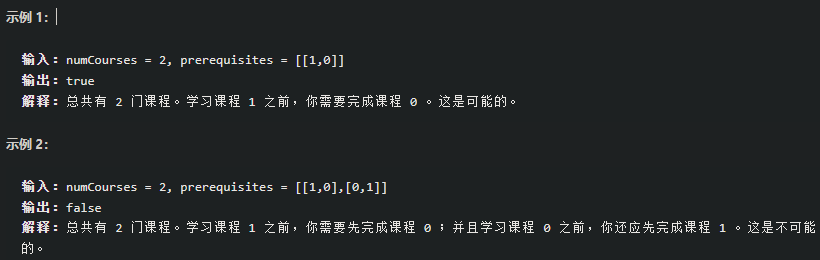

In [6]:
# Todo: 依旧超时， 还未解决
def lc207(numCourses, prerequisites):
    ## 统计每一门课的先修课程和课程数量
    dic = {}
    for i in range(numCourses):
        dic[i] = []
    for after,before in prerequisites:
        dic[after].append(before)

    deq = deque()
    used = set()
    ## 没有先修课程代表可以学习
    for i in dic:
        if len(dic[i]) == 0:
            deq.append(i)

    while deq:
        d = deq.popleft()
        used.add(d)
        for i in dic:
            if d in dic[i]:
                dic[i].remove(d)
            if len(dic[i]) == 0 and i not in used:
                deq.append(i)

    for i in dic:
        if len(dic[i]) > 0:
            return False
    return True

numCourses = 2
prerequisites = [[1,0],[0,1]]
lc207(numCourses,prerequisites)
# numCourses = 500
# prerequisites = [[481,475],[196,63],[438,33],[212,328],[268,20],[226,288],[436,487],[199,494],[421,279],[369,14],[92,91],[183,174],[271,15],[4,435],[435,47],[217,460],[216,319],[468,125],[115,1],[435,383],[192,136],[86,103],[336,342],[5,301],[255,253],[185,37],[323,168],[417,241],[151,208],[347,53],[180,329],[198,452],[31,419],[406,74],[324,105],[164,494],[281,316],[139,318],[269,214],[21,269],[271,234],[142,50],[304,375],[285,438],[120,251],[275,423],[447,91],[420,443],[163,476],[436,423],[76,487],[3,443],[262,309],[398,194],[26,468],[413,241],[187,472],[279,58],[29,48],[173,250],[423,499],[456,242],[34,102],[42,376],[286,159],[147,55],[208,449],[352,86],[147,228],[111,306],[108,238],[297,290],[199,472],[263,451],[383,116],[441,465],[490,396],[39,342],[16,441],[175,405],[139,70],[377,370],[244,276],[379,188],[175,188],[3,165],[291,485],[162,293],[336,140],[236,61],[297,424],[413,403],[75,161],[148,232],[9,313],[260,186],[390,116],[282,350],[239,357],[33,285],[231,24],[342,82],[58,210],[423,356],[85,97],[197,346],[157,467],[210,364],[276,283],[170,54],[113,332],[48,270],[43,166],[416,42],[261,341],[373,76],[32,128],[382,302],[89,376],[414,363],[346,474],[245,460],[62,440],[138,458],[427,419],[412,128],[400,308],[229,286],[134,153],[332,488],[67,343],[401,202],[130,370],[345,242],[211,169],[128,346],[372,128],[405,139],[181,344],[65,52],[257,40],[355,133],[188,416],[128,362],[30,365],[329,88],[261,32],[197,171],[387,463],[316,360],[364,250],[167,129],[25,318],[429,87],[274,272],[426,92],[24,127],[123,245],[238,164],[124,275],[98,48],[275,414],[217,409],[80,326],[486,180],[223,182],[344,236],[147,153],[20,63],[177,51],[430,57],[447,108],[339,265],[455,6],[249,300],[367,279],[368,309],[460,175],[453,366],[352,129],[433,127],[319,78],[369,114],[156,400],[80,146],[190,194],[148,9],[230,107],[236,449],[417,287],[486,63],[92,301],[77,332],[101,111],[33,373],[189,265],[458,209],[318,219],[179,451],[30,259],[7,252],[45,403],[18,261],[7,413],[387,211],[230,80],[194,26],[61,200],[336,483],[385,410],[196,260],[487,16],[193,494],[490,410],[217,499],[387,119],[30,174],[47,165],[409,352],[420,189],[294,242],[332,335],[341,13],[6,121],[479,282],[491,373],[60,269],[476,29],[239,59],[365,408],[361,205],[427,329],[185,30],[339,424],[6,190],[50,274],[483,98],[304,233],[214,294],[230,29],[441,401],[46,217],[339,446],[54,183],[427,378],[9,319],[446,337],[120,219],[280,371],[390,495],[44,378],[108,95],[209,126],[234,156],[206,367],[178,273],[237,49],[374,155],[201,176],[208,122],[178,131],[12,432],[152,461],[309,386],[79,114],[337,271],[226,200],[177,117],[259,41],[427,423],[75,449],[430,427],[256,320],[497,309],[87,324],[383,311],[233,464],[97,161],[484,38],[397,200],[312,258],[252,207],[478,169],[207,441],[210,28],[179,305],[250,85],[181,491],[250,426],[441,43],[484,115],[274,316],[432,55],[424,21],[361,252],[432,95],[423,174],[95,316],[65,15],[87,305],[255,109],[151,282],[391,85],[63,114],[411,279],[42,238],[160,461],[77,115],[211,287],[433,427],[230,179],[146,183],[255,128],[125,165],[126,383],[483,490],[22,481],[90,232],[435,389],[387,246],[53,329],[131,7],[3,483],[281,191],[335,401],[464,482],[277,289],[418,489],[289,210],[83,199],[54,131],[439,206],[462,182],[107,147],[36,236],[72,267],[59,471],[86,91],[35,150],[331,420],[414,151],[467,266],[440,141],[410,349],[347,179],[475,241],[477,108],[138,237],[172,68],[69,97],[266,40],[43,466],[118,406],[238,303],[92,216],[157,13],[127,337],[159,162],[343,344],[153,311],[114,255],[22,203],[236,46],[360,235],[57,358],[311,73],[450,444],[134,283],[444,60],[55,248],[372,343],[193,286],[20,458],[78,390],[360,477],[355,164],[465,212],[191,15],[374,241],[75,118],[115,374],[359,361],[153,479],[83,53],[377,406],[21,304],[348,176],[408,52],[366,25],[375,80],[104,98],[84,428],[251,423],[437,29],[197,258],[213,488],[386,114],[204,375],[148,367],[129,363],[419,369],[176,113],[359,175],[160,303],[341,224],[352,41],[414,6],[135,214],[369,240],[48,361],[88,427],[311,305],[441,147],[333,148],[494,73],[6,82],[49,280],[423,471],[262,362],[222,316],[199,414],[370,84],[122,403],[9,315],[323,266],[270,338],[460,72],[171,335],[28,342],[198,402],[367,9],[22,307],[13,34],[363,446],[297,404],[73,60],[95,53],[252,166],[216,414],[384,270],[464,50],[0,185],[478,19],[172,457],[2,479],[290,409],[138,369],[262,175],[93,368],[326,59],[13,125],[360,260],[333,110],[21,95],[323,134],[65,432],[33,411],[490,252],[389,169],[2,45],[18,248],[374,452],[457,56],[212,33],[428,485],[229,323],[36,235],[324,276],[41,382],[451,400],[390,473],[487,33],[64,414],[271,461],[149,384],[360,31],[393,119],[294,235],[447,204],[450,499],[308,345],[44,295],[111,491],[125,49],[293,473],[182,3],[324,358],[302,455],[274,188],[297,387],[12,278],[348,86],[425,5],[163,463],[219,354],[481,380],[1,31],[43,80],[339,159],[452,303],[367,182],[162,456],[420,99],[164,354],[214,84],[445,272],[16,14],[90,236],[483,180],[187,474],[312,53],[478,22],[185,376],[342,132],[219,35],[460,92],[151,350],[146,459],[469,287],[332,361],[179,145],[90,438],[11,417],[361,329],[173,423],[376,341],[456,327],[74,261],[261,402],[446,418],[62,339],[333,462],[92,32],[419,451],[269,452],[86,247],[441,6],[178,219],[175,122],[474,176],[336,10],[400,483],[185,334],[343,175],[207,261],[77,157],[236,325],[416,234],[304,359],[136,165],[411,129],[272,230],[482,416],[51,245],[105,80],[243,50],[76,390],[420,261],[261,433],[218,448],[308,469],[272,52],[37,384],[7,70],[292,195],[312,57],[311,142],[97,431],[386,294],[316,320],[465,42],[440,433],[91,134],[179,302],[365,115],[247,67],[139,149],[230,232],[384,1],[330,450],[41,144],[191,192],[54,271],[6,456],[481,443],[66,219],[346,301],[168,226],[269,353],[312,318],[104,467],[198,399],[377,398],[226,197],[440,164],[146,177],[292,494],[494,360],[64,464],[314,349],[254,25],[100,293],[20,274],[486,444],[17,173],[143,404],[338,203],[179,126],[135,84],[389,398],[404,480],[173,228],[245,466],[98,194],[37,116],[328,111],[150,218],[31,237],[488,225],[151,397],[40,269],[242,136],[420,469],[378,61],[34,157],[268,485],[175,442],[460,437],[119,237],[410,174],[348,446],[334,282],[363,73],[205,185],[66,218],[97,159],[407,363],[288,269],[348,105],[315,272],[280,492],[175,483],[194,316],[33,81],[47,402],[480,248],[444,74],[127,373],[142,309],[114,336],[384,213],[14,102],[228,83],[425,113],[427,42],[228,286],[333,205],[238,371],[3,334],[415,298],[396,482],[16,311],[77,269],[295,269],[432,322],[200,353],[360,388],[17,266],[370,350],[316,120],[146,186],[378,363],[186,224],[45,196],[401,434],[92,296],[82,120],[90,216],[263,352],[479,66],[13,185],[313,275],[437,469],[391,59],[214,74],[72,372],[383,27],[258,235],[486,460],[137,78],[285,89],[293,238],[117,411],[91,51],[137,318],[409,345],[10,224],[407,274],[161,440],[351,100]]

False

## DFS相关题目

### LC.695 [岛屿的最大面积](https://leetcode.cn/problems/max-area-of-island/description/)
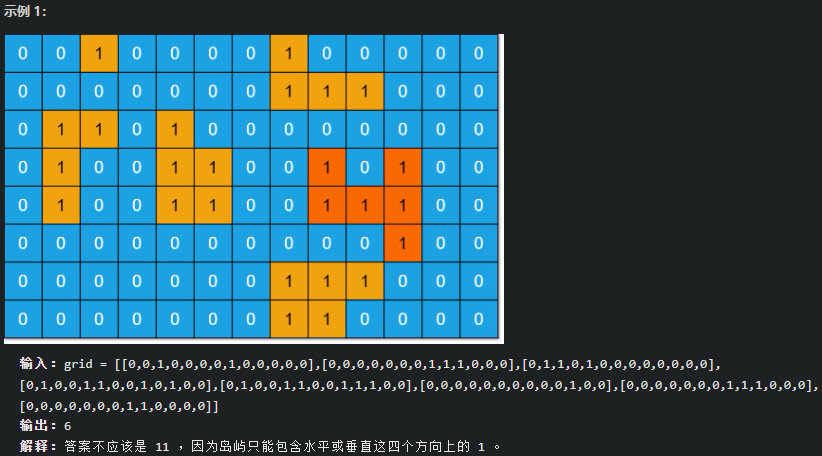

In [7]:
def lc695(grid):
    m,n = len(grid),len(grid[0])
    
    def dfs(i,j,grid):
        if not 0<=i<m or not 0<=j<n or grid[i][j] == 0:
            return 0
        else:
            grid[i][j] = 0
            return 1 + dfs(i-1,j,grid) + dfs(i+1,j,grid) + dfs(i,j-1,grid) + dfs(i,j+1,grid)
        
    result = []
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 1:
                result.append(dfs(i,j,grid))
                
    return max(result) if len(result) > 0 else 0  # 特殊情况，可能没有陆地

grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
lc695(grid)

6

### LC.200 [海岛数量](https://leetcode.cn/problems/number-of-islands/)
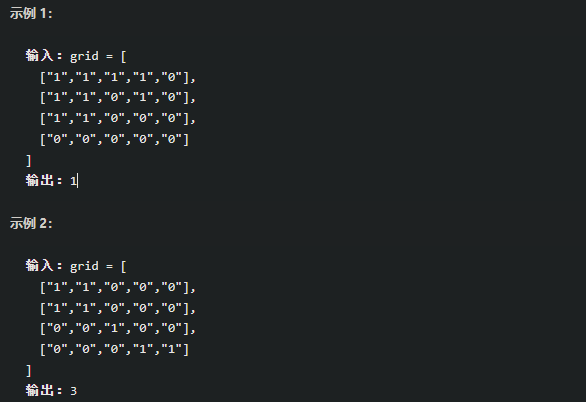

In [8]:
def lc200(grid):
    m,n = len(grid),len(grid[0])
    def dfs(i,j,grid):
        if not 0<=i<m or not 0<=j<n or grid[i][j] == '0':
            return 
        else:
            grid[i][j] = '0'
            dfs(i-1,j,grid);dfs(i+1,j,grid);dfs(i,j-1,grid);dfs(i,j+1,grid)
        
    result = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
                result += 1
                dfs(i,j,grid)
    return result
grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
lc200(grid)

3

###  LC.130 [被围绕的面积](https://leetcode.cn/problems/surrounded-regions/)
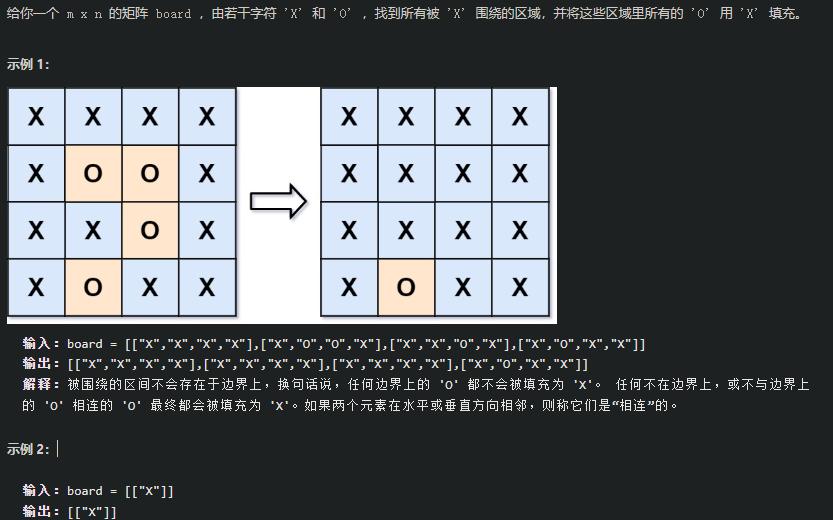

In [9]:
def lc130(grid):
    # 先把四周的用dfs填充，在计算剩下的‘O’的个数
    m,n = len(grid),len(grid[0])
    
    def dfs(i,j,grid):
        if not 0<=i<m or not 0<=j<n or grid[i][j] == 'X':
            return 
        else:
            grid[i][j] = '#'
            dfs(i-1,j,grid);dfs(i+1,j,grid);dfs(i,j-1,grid);dfs(i,j+1,grid)
            return
        
    def dfs2(i,j,grid):
        if not 0<=i<m or not 0<=j<n or grid[i][j] == 'X':
            return 0
        else:
            grid[i][j] = 'X'
            return 1 + dfs2(i-1,j,grid) + dfs2(i+1,j,grid) + dfs2(i,j-1,grid) + dfs2(i,j+1,grid)
        
    # 将四周的‘O’变为‘X’  
    for i in range(m):
        for j in range(n):
            if i==0 or j==0 or i == m-1 or j == n-1:
                dfs(i,j,grid)
    # 统计剩下的‘O’的个数
    result = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 'O':
                result += dfs2(i,j,grid)
    return result,board       
## 看错题了，这个可以统计内部的个数result，最后在将‘#’换为‘O’即可
board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
lc130(board)

(3,
 [['X', 'X', 'X', 'X'],
  ['X', 'X', 'X', 'X'],
  ['X', 'X', 'X', 'X'],
  ['X', '#', 'X', 'X']])

### LC.417 [太平洋大西洋水流问题](https://leetcode.cn/problems/pacific-atlantic-water-flow/description/)
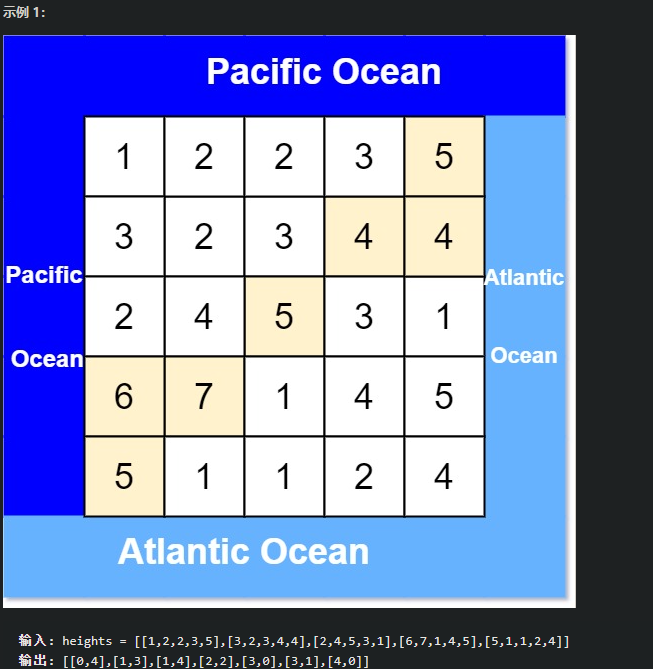

In [10]:
def lc417(heights):
    ## 分别统计大西洋能到的位置和太平洋能到的位置，然后取交集
    m,n = len(heights),len(heights[0])
    
    def dfs1(i,j,heights,x,y):
        if not 0<=i<m or not 0<=j<n:
            return 
        if (i,j) not in pac and heights[i][j] >= heights[x][y]:
            pac.add((i,j))
            dfs1(i-1,j,heights,i,j);
            dfs1(i+1,j,heights,i,j);
            dfs1(i,j-1,heights,i,j);
            dfs1(i,j+1,heights,i,j)
    
    def dfs2(i,j,heights,x,y):
        if not 0<=i<m or not 0<=j<n:
            return 
        if (i,j) not in atl and heights[i][j] >= heights[x][y]:
            atl.add((i,j))
            dfs2(i-1,j,heights,i,j);
            dfs2(i+1,j,heights,i,j);
            dfs2(i,j-1,heights,i,j);
            dfs2(i,j+1,heights,i,j)
            
    # 太平洋
    pac = set()
    for i in range(m):
        dfs1(i,0,heights,i,0)
    for j in range(n):
        dfs1(0,j,heights,0,j)
        
    # 大西洋
    atl = set()
    for i in range(m):
        dfs2(i,n-1,heights,i,n-1)
    for j in range(n):
        dfs2(m-1,j,heights,m-1,j)
        
    print(pac,'\n',atl)
    print([list(i) for i in pac if i in atl])
heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
lc417(heights)

{(0, 1), (1, 2), (0, 4), (2, 1), (4, 0), (0, 0), (3, 1), (1, 1), (0, 3), (2, 0), (1, 4), (3, 0), (0, 2), (2, 2), (1, 0), (1, 3)} 
 {(4, 4), (2, 4), (4, 0), (0, 4), (3, 4), (4, 1), (3, 1), (4, 3), (1, 4), (3, 0), (2, 3), (4, 2), (3, 3), (2, 2), (3, 2), (1, 3)}
[[0, 4], [4, 0], [3, 1], [1, 4], [3, 0], [2, 2], [1, 3]]


### LC.547 [朋友圈](https://leetcode.cn/problems/friend-circles/description/)
### 没找到题……（待补充）

## 岛屿问题总结：大多适用于DFS，重点为边界和内部分别DFS，
##### 200. 岛屿数量
##### 1254. 统计封闭岛屿的数目
##### 695. 岛屿的最大面积
##### 463. 岛屿的周长
##### 130. 被围绕的区域
##### 1020. 飞地的数量

### LC.1254 [统计封闭岛屿的数目](https://leetcode.cn/problems/number-of-closed-islands/)
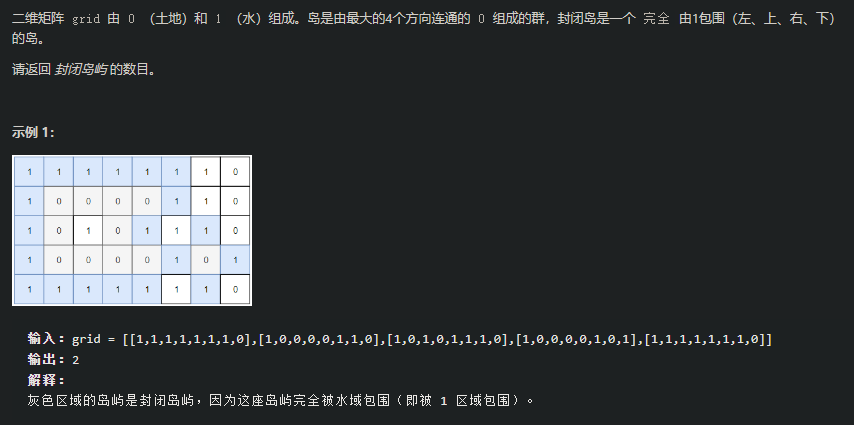

In [11]:
def lc1254(grid):
    ## 先将周围的陆地变为海水，然后在统计封闭岛屿的个数
    row,col = len(grid),len(grid[0])

    def dfs1(i,j,grid):
        if not 0<=i<row or not 0<=j<col:
            return
        elif grid[i][j] == 0:
            grid[i][j] = 1
            dfs1(i-1,j,grid);dfs1(i+1,j,grid);dfs1(i,j-1,grid);dfs1(i,j+1,grid)
        else:
            return
    # 四周陆地
    for i in range(row):
        for j in range(col):
            if i == 0 or j == 0 or i == row-1 or j == col-1:
                dfs1(i,j,grid)
    # 统计中间岛屿
    result = 0
    for i in range(row):
        for j in range(col):
            if grid[i][j] == 0:
                result += 1
                dfs1(i,j,grid)
    return result
grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
lc1254(grid)

2

### LC.463 [岛屿的周长](https://leetcode.cn/problems/island-perimeter/)
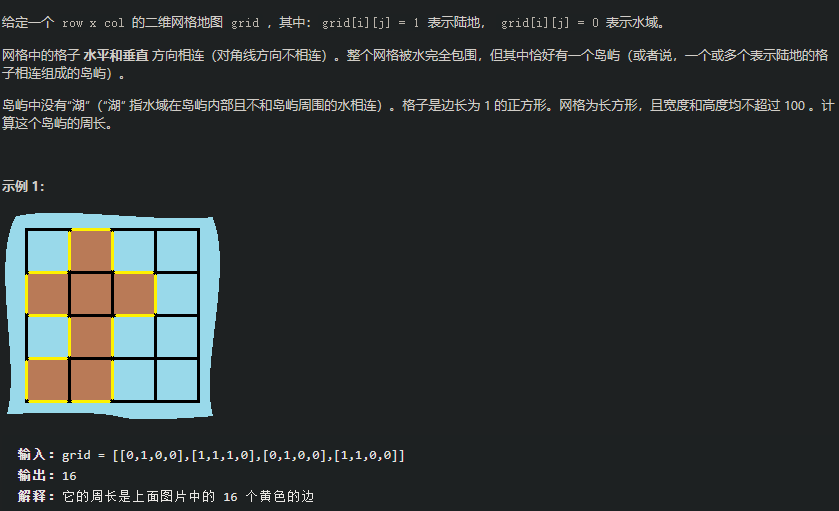

In [12]:
def lc463(grid):
    ## 每个陆地与海水/边界的交界的集合就是周长（真不知道为啥是简单题（dog））
    m,n = len(grid),len(grid[0])
    
    def dfs(i,j,grid):
        nonlocal result
        if not 0<=i<m or not 0<=j<n or grid[i][j] == 0:
            result += 1
            return
        else:
            if (i,j) not in used:
                used.add((i,j))
                dfs(i-1,j,grid);dfs(i+1,j,grid);dfs(i,j-1,grid);dfs(i,j+1,grid)
    
    result = 0
    used = set()
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 1:
                dfs(i,j,grid)
                
    return result

grid = [[0,1,0,0],[1,1,1,0],[0,1,0,0],[1,1,0,0]]
lc463(grid)

16

### LC.1020 [飞地的数量](https://leetcode.cn/problems/number-of-enclaves/)
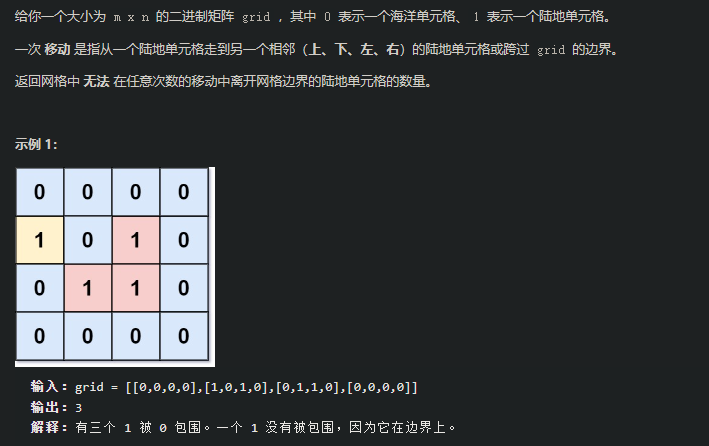

In [13]:
## 大同小异
def lc1020(grid):
    # 先把四周的dfs变为海水，然后dfs飞地数量
    row,col = len(grid),len(grid[0])

    def dfs1(i,j,grid):
        if not 0<=i<row or not 0<=j<col:
            return
        if grid[i][j] == 1:
            grid[i][j] = 0
            dfs1(i-1,j,grid)
            dfs1(i+1,j,grid)
            dfs1(i,j-1,grid)
            dfs1(i,j+1,grid)
        return

    def dfs2(i,j,grid):
        nonlocal result
        if not 0<=i<row or not 0<=j<col:
            return
        if grid[i][j] == 1:
            grid[i][j] = 0
            result += 1
            dfs2(i-1,j,grid)
            dfs2(i+1,j,grid)
            dfs2(i,j-1,grid)
            dfs2(i,j+1,grid)

    # 处理边缘陆地
    for i in range(row):
        for j in range(col):
            if i==0 or j==0 or i == row-1 or j == col-1:
                dfs1(i,j,grid)
    # 统计飞地数量
    result = 0
    for i in range(row):
        for j in range(col):
            if grid[i][j] == 1:
                dfs2(i,j,grid)
    return result

grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
lc1020(grid)

3